**Python Day 4**

1. Joining dataframes
2. Transpose, pivot, melt (wide and long formats)
3. Data visualization

In [1]:
import pandas as pd
import numpy as np

# Joining dataframes

**Scenarios:**
1. Two datasets with same column names `pd.concat()`
2. Adding columns from one dataframe to another `pd.concat()`
3. Merge two dataframes to join columns `merge()`


## Scenario 1 - Two datasets with same column names

In [2]:
# creating mock data for the exercise
df = pd.read_csv('SN7577.tab', sep = '\t')
df_a = df.head(10) # import your datafile A
df_b = df.tail(20) # import yoir datafile B

In [25]:
complete_df = pd.concat([df_a, df_b]).reset_index(drop=True)
complete_df

,Q1,Q2,Q3,Q4,Q5ai,Q5aii,Q5aiii,Q5aiv,Q5av,Q5avi,...,numhhd,numkid,numkid2,numkid31,numkid32,numkid33,numkid34,numkid35,numkid36,wts
0,1,-1,1,8,0,0,0,1,0,0,...,3,11,2,0,0,0,0,1,0,1.11439
1,3,-1,1,4,0,0,0,0,0,0,...,3,11,2,0,0,0,0,1,0,2.56604
2,10,3,2,6,0,0,0,0,0,0,...,2,11,2,0,0,0,0,1,0,2.04468
3,9,-1,10,10,0,0,0,0,0,0,...,1,-1,2,0,0,0,0,1,0,1.07592
4,10,2,6,1,0,0,0,1,0,0,...,1,-1,2,0,0,0,0,1,0,1.25068
5,1,-1,1,1,0,0,0,0,0,0,...,2,-1,2,0,0,0,0,1,0,0.85126
6,1,-1,1,8,0,0,0,0,0,0,...,2,-1,2,0,0,0,0,1,0,1.51383
7,1,-1,1,1,0,0,0,0,0,0,...,2,-1,2,0,0,0,0,1,0,0.86168
8,9,-1,10,10,0,0,0,0,0,0,...,2,11,2,0,0,0,0,1,0,0.48973
9,2,-1,1,1,0,0,0,0,0,0,...,1,-1,2,0,0,0,0,1,0,0.36381


## Scenario 2 - Adding columns from one dataframe to another

In [8]:
# making mock data for this example
list_len = complete_df.shape[0]
list_subject_names = []
list_numbers = list(np.random.choice(np.arange(1, 999), list_len, replace=False))

for n in list_numbers:
    list_subject_names.append('subject'+str(n))

# print(list_subject_names)

subject_id = pd.DataFrame(list_subject_names, columns = ['subject_id'])
subject_id.head()

,subject_id
0,subject110
1,subject630
2,subject738
3,subject508
4,subject880


In [12]:
complete_df = pd.concat([complete_df, subject_id], axis=1) # axis=0 rows, default; axis=1 columns

## Scenario 3 - Merge two dataframes to join columns

A. Dataframes share a key column with the same name  
B. Dataframes share a key column with different name

In [13]:
# let's make mock data
df1 = complete_df.loc[:10, ['subject_id', 'Q1', 'Q2']]
df2 = complete_df.loc[:, ['subject_id', 'Q3', 'Q4']]
df3 = df2.rename(columns={'subject_id':'subjectID'}).sort_values('subjectID')

### A. Dataframes share a key column with the same name

In [18]:
pd.merge(df1, df2, on = 'subject_id', how = 'outer')

,subject_id,Q1,Q2,Q3,Q4
0,subject110,1.0,-1.0,1,8
1,subject630,3.0,-1.0,1,4
2,subject738,10.0,3.0,2,6
3,subject508,9.0,-1.0,10,10
4,subject880,10.0,2.0,6,1
5,subject226,1.0,-1.0,1,1
6,subject854,1.0,-1.0,1,8
7,subject273,1.0,-1.0,1,1
8,subject812,9.0,-1.0,10,10
9,subject977,2.0,-1.0,1,1


The parameter `how` controls how the merging happens:

- `how = 'inner'` == Use intersection of keys from both dataframes **default**
- `how = 'outer'` == Use union of keys from both dataframes (full)
- `how = 'left'` == Use keys from the left dataframe
- `how = 'right'` == Use keys from the right dataframe

`pd.merge(df1, df2, on = "subject_id")`
- df1 is left
- df2 is right

### B. Dataframes share a key column with different name

In [21]:
pd.merge(df1, df3, 
         left_on = 'subject_id', 
         right_on = 'subjectID', 
         how = 'left').drop('subjectID', axis=1)

,subject_id,Q1,Q2,Q3,Q4
0,subject110,1,-1,1,8
1,subject630,3,-1,1,4
2,subject738,10,3,2,6
3,subject508,9,-1,10,10
4,subject880,10,2,6,1
5,subject226,1,-1,1,1
6,subject854,1,-1,1,8
7,subject273,1,-1,1,1
8,subject812,9,-1,10,10
9,subject977,2,-1,1,1


# Transpose, pivot, and melt

- Transpose flips the dataframe; that is rows become columns, and vice-versa
- Wide or long, or unstacked and stacked are different presentations of tabular data  
- We might need to change the presentation of our data for plotting
- Wide, or unstacked has different data variables in separate columns
- Long, narrow, or stacked has one column containing all the variable names and another column containing their respective values.

**WIDE**

|PERSON|AGE|HEIGHT|WEIGHT|
|------|------|------|------|
|Bob|32|168|180|
|Alice|24|150|175|
|Steve|64|144|164|


**LONG**

|PERSON|VARIABLE|VALUE|
|------|------|------|
|Bob|Age|32|
|Bob|Weight|168|
|Bob|Height|180|
|Alice|Age|24|
|Alice|Weight|150|
|Alice|Height|175|
|Steve|Age|64|
|Steve|Weight|144|
|Steve|Height|165|

**TRANSPOSE**

|PERSON|Bob|Alice|Steve|
|------|------|------|------|
|AGE|32|24|64|
|HEIGHT|168|150|144|
|WEIGHT|64|144|164

## Transpose


In [27]:
df_merged = pd.merge(df1, df2, on='subject_id', how='outer')
df_merged

,subject_id,Q1,Q2,Q3,Q4
0,subject110,1.0,-1.0,1,8
1,subject630,3.0,-1.0,1,4
2,subject738,10.0,3.0,2,6
3,subject508,9.0,-1.0,10,10
4,subject880,10.0,2.0,6,1
5,subject226,1.0,-1.0,1,1
6,subject854,1.0,-1.0,1,8
7,subject273,1.0,-1.0,1,1
8,subject812,9.0,-1.0,10,10
9,subject977,2.0,-1.0,1,1


In [30]:
df_merged1 = df_merged.set_index('subject_id')
df_merged1.T

subject_id,subject110,subject630,subject738,subject508,subject880,subject226,subject854,subject273,subject812,subject977,...,subject256,subject397,subject950,subject235,subject625,subject403,subject719,subject158,subject364,subject894
Q1,1.0,3.0,10.0,9.0,10.0,1.0,1.0,1.0,9.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q2,-1.0,-1.0,3.0,-1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q3,1.0,1.0,2.0,10.0,6.0,1.0,1.0,1.0,10.0,1.0,...,4.0,5.0,4.0,2.0,3.0,3.0,2.0,8.0,1.0,6.0
Q4,8.0,4.0,6.0,10.0,1.0,1.0,8.0,1.0,10.0,1.0,...,6.0,4.0,5.0,3.0,4.0,6.0,10.0,9.0,2.0,6.0


## From wide to long

In [36]:
# get list of variables
variables = list(df_merged.columns[1:])

df_long = pd.melt(df_merged,
       id_vars = 'subject_id', value_vars = variables,
       var_name = 'q_variable', value_name = 'count')
df_long.head()

,subject_id,q_variable,count
0,subject110,Q1,1.0
1,subject630,Q1,3.0
2,subject738,Q1,10.0
3,subject508,Q1,9.0
4,subject880,Q1,10.0


## From long to wide

In [40]:
df_wide = df_long.pivot(index = 'subject_id', 
             columns = 'q_variable',
             values = 'count').reset_index(level=0).fillna(0)
df_wide.head()

q_variable,subject_id,Q1,Q2,Q3,Q4
0,subject10,0.0,0.0,1.0,6.0
1,subject110,1.0,-1.0,1.0,8.0
2,subject13,0.0,0.0,4.0,5.0
3,subject150,0.0,0.0,3.0,3.0
4,subject158,0.0,0.0,8.0,9.0


# Data Visualization

  
**A. DATA**

The data we'll use: `SAFI_full_shortname.csv`

Datasets from SAFI Teaching Database
- SAFI (Studying African Farmer-Led Irrigation)
- Project is looking at farming and irrigation methods. 
- Survey data relating to households and agriculture in Tanzania and Mozambique

(https://datacarpentry.org/socialsci-workshop/data/)

In [41]:
df = pd.read_csv('SAFI_full_shortname.csv')
df.head()

,key_id,interview_date,quest_no,start,end,province,district,ward,village,years_farm,...,items_owned,items_owned_other,no_meals,months_lack_food,no_food_mitigation,gps_Latitude,gps_Longitude,gps_Altitude,gps_Accuracy,instanceID
0,1,17 November 2016,1,2017-03-23T09:49:57.000Z,2017-04-02T17:29:08.000Z,Manica,Manica,Bandula,God,11,...,['bicycle' ; 'television' ; 'solar_panel' ; ...,NaN,2,['Jan'],['na' ; 'rely_less_food' ; 'reduce_meals' ; ...,-19.112259,33.483456,698,14.0,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef
1,2,17 November 2016,1,2017-04-02T09:48:16.000Z,2017-04-02T17:26:19.000Z,Manica,Manica,Bandula,God,2,...,['cow_cart' ; 'bicycle' ; 'radio' ; 'cow_pl...,NaN,2,['Jan' ; 'Sept' ; 'Oct' ; 'Nov' ; 'Dec'],['na' ; 'reduce_meals' ; 'restrict_adults' ;...,-19.112477,33.483416,690,19.0,uuid:099de9c9-3e5e-427b-8452-26250e840d6e
2,3,17 November 2016,3,2017-04-02T14:35:26.000Z,2017-04-02T17:26:53.000Z,Manica,Manica,Bandula,God,40,...,['solar_torch'],NaN,2,['Jan' ; 'Feb' ; 'Mar' ; 'Oct' ; 'Nov' ; ...,['na' ; 'restrict_adults' ; 'lab_ex_food'],-19.112108,33.483450,674,13.0,uuid:193d7daf-9582-409b-bf09-027dd36f9007
3,4,17 November 2016,4,2017-04-02T14:55:18.000Z,2017-04-02T17:27:16.000Z,Manica,Manica,Bandula,God,6,...,['bicycle' ; 'radio' ; 'cow_plough' ; 'sola...,NaN,2,['Sept' ; 'Oct' ; 'Nov' ; 'Dec'],['na' ; 'reduce_meals' ; 'restrict_adults' ;...,-19.112229,33.483424,679,5.0,uuid:148d1105-778a-4755-aa71-281eadd4a973
4,5,17 November 2016,5,2017-04-02T15:10:35.000Z,2017-04-02T17:27:35.000Z,Manica,Manica,Bandula,God,18,...,['motorcyle' ; 'radio' ; 'cow_plough' ; 'mo...,NaN,2,['Aug' ; 'Sept' ; 'Oct' ; 'Nov'],['na' ; 'go_forest' ; 'migrate'],-19.112217,33.483425,689,10.0,uuid:2c867811-9696-4966-9866-f35c3e97d02d


In [42]:
list(df.columns)

['key_id',
 'interview_date',
 'quest_no',
 'start',
 'end',
 'province',
 'district',
 'ward',
 'village',
 'years_farm',
 'agr_assoc',
 'note2',
 'no_membrs',
 'members_count',
 'remittance_money',
 'years_liv',
 'parents_liv',
 'sp_parents_liv',
 'grand_liv',
 'sp_grand_liv',
 'respondent_roof_type',
 'respondent_wall_type',
 'respondent_wall_type_other',
 'respondent_floor_type',
 'window_type',
 'buildings_in_compound',
 'rooms',
 'other_buildings',
 'no_plots',
 'plots_count',
 'water_use',
 'no_group_count',
 'yes_group_count',
 'no_enough_water',
 'months_no_water',
 'period_use',
 'exper_other',
 'other_meth',
 'res_change',
 'memb_assoc',
 'resp_assoc',
 'fees_water',
 'affect_conflicts',
 'note',
 'need_money',
 'money_source',
 'money_source_other',
 'crops_contr',
 'emply_lab',
 'du_labour',
 'liv_owned',
 'liv_owned_other',
 'liv_count',
 'poultry',
 'du_look_aftr_cows',
 'items_owned',
 'items_owned_other',
 'no_meals',
 'months_lack_food',
 'no_food_mitigation',
 'gps_L

In [43]:
df.shape

(131, 65)

In [44]:
# import seaborn
import seaborn as sns

Matplotlib created a temporary config/cache directory at /var/folders/8g/134fm1s93lgdvrb92_yvlxvw0000gn/T/matplotlib-hczlqchj because the default path (/Users/grachetng/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


So, I'll demonstrate to you

1. Line plot
2. Bar chart

## Line plot

Let's break our steps down:

1. Subset data of interest
2. Get the year from `interview_date` using `str.split()`
3. Get the number of items owned by househld from the `item_owned` column using `str.len()`
4. Check for NaN values, fill values with zero if necessary
5. Get the mean number of items owned in each village using `groupby().mean()`
6. Plot :)

In [54]:
df_line = df[['village', 'items_owned']]
df_line['year'] = df['interview_date'].str.split(' ').str[-1]
df_line['items_owned'] = df['items_owned'].str.len()
df_line['items_owned'] = df_line['items_owned'].fillna(0)
df_line = df_line.groupby(['village','year']).mean().astype(int).reset_index()

<ipython-input-54-dd8eeeaaa6de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_line['year'] = df['interview_date'].str.split(' ').str[-1]
<ipython-input-54-dd8eeeaaa6de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_line['items_owned'] = df['items_owned'].str.len()
<ipython-input-54-dd8eeeaaa6de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
plt.rcParams['figure.figsize'] = [5,5]

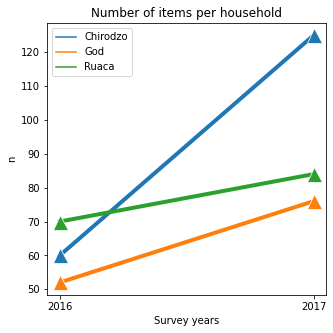

In [72]:
fig, ax = plt.subplots()

fig = sns.lineplot(data = df_line,
                  x = 'year',
                  y = 'items_owned',
                  hue = "village",
                  linewidth = 4,
                  marker = '^',
                  markersize=15)
ax.legend()
ax.set_ylabel('n')
ax.set_xlabel('Survey years')
ax.set_title('Number of items per household');
plt.savefig('line_plot.png', dpi = 300, facecolor = 'w', edgecolor='w')

<img src="https://media.giphy.com/media/5IT69msgpaOcg/giphy.gif" width="750" align="center">

**Which one are you?**  
#1  
<img src="https://media.giphy.com/media/7yDthHaq2haXS/giphy.gif" width="300" align="left">   
#2   
<img src="https://media.giphy.com/media/JIX9t2j0ZTN9S/giphy.gif" width="300" align="left"> 